<a href="https://colab.research.google.com/github/AzlinRusnan/Data-Mining/blob/main/Famous_Local_Brand_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Comparative Analysis of Baju Kurung on RR BY Rizman Ruzaini Website**

*Traditional attire is the canvas of a culture's history, painted with the colors of heritage and woven with the threads of legacy.*

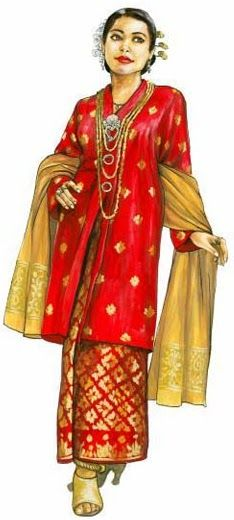

The month of Hari Raya or Eid Fitr is almost over, but the festive mood continues as I write this article on the 7th May 2024 (28th of Syawal in the year of 1445 Hijri). As we flashback to the final days of Ramadan, we were filled with excitement for the coming Hari Raya celebrations in addition to the respect of fasting. The preparations were extensive, from planning the lavish Hari Raya feast to choosing the ideal “Gala Raya” outfit, which is one of the most enjoyable activities for many women. Hari Raya is a special day that we celebrate in style, bringing joy and happiness after one month of fasting.


In the world of internet-based fashion sales, understanding product offering and pricing strategies provides invaluable insights into customer preferences and market trends, particularly as they relate to the festive occasion like Hari Raya. This report analyses the first three pages of product listing from the Rizman Ruzaini website (https://www.rrbyrizmanruzaini.com/) on women’s wear. In their latest Hari Raya collection, Rizman Ruzaini continues to preserve the beautiful Malay culture, featuring a range of women’s attire including “Kurung Moden”, “Kurung Pahang”, “Kurung Kedah” and basic wear.


For this report we are focusing specifically on two categories, “Kurung Pahang” and “Kurung Moden”. This mainly because "Kurung Pahang" represents a more traditional approach, while "Kurung Moden " often incorporates modern design elements, appealing to different customer. Also, by comparing these two categories helps highlight how different categories within the same product can have varied pricing strategies. The data for this analysis was extracted using SelectorGadjet, and organized to capture key variables such as Product, Price Before Sale, Price After Sale and Category. The Analysis was performed using the R programming language.


In [3]:
library(rvest)
library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
pages <- paste0('https://www.rrbyrizmanruzaini.com/collections/rr-womenswear?page=', 0:2)

In [ ]:
# Function to determine the category based on the product name
get_category <- function(product_name) {
  if (grepl("Kurung Pahang", product_name)) {
    "Kurung Pahang"
  } else if (grepl("Kurung Modern", product_name)) {
    "Kurung Moden"
  } else if (grepl("Kurung Kedah", product_name)) {
    "Kurung Kedah"
  } else if (grepl("Set Basic", product_name)) {
    "Set Basic"
  } else {
    "Other"
  }
}

In [ ]:
# Function to scrape product names, before sale prices, and after sale prices
Price <- function(page) {
  url <- read_html(page)

  # Extracting product names
  product_nodes <- html_nodes(url, '.grid-product__title') # Adjust if needed
  products <- html_text(product_nodes, trim = TRUE)

  # Extracting prices
  price_nodes <- html_nodes(url, '.grid-product__price')
  prices <- html_text(price_nodes, trim = TRUE)

  # Clean and extract before and after sale prices
  prices_before_sale <- sapply(prices, function(x) {
    if (grepl("Regular price", x)) {
      sub("Regular price\\s+RM\\s*", "", str_extract(x, "Regular price\\s+RM\\s*[0-9,.]+"))
    } else {
      NA
    }
  })
  prices_after_sale <- sapply(prices, function(x) {
    if (grepl("Sale price", x)) {
      sub("Sale priceRM\\s*", "", str_extract(x, "Sale priceRM\\s*[0-9,.]+"))
    } else {
      NA
    }
  })

  # Determining the category for each product
  categories <- sapply(products, get_category)

  # Create a dataframe
  data_frame(Product = products, PriceBeforeSale = prices_before_sale, PriceAfterSale = prices_after_sale, Category = categories)
}

In [ ]:
# Apply the function to each page and combine the results
product_data <- do.call(rbind, lapply(pages, Price))
head(product_data)

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
ℹ Please use `tibble()` instead.”


Product,PriceBeforeSale,PriceAfterSale,Category
<chr>,<chr>,<chr>,<chr>
RR Baju Kurung Pahang Songket in Navy Silver,399.00,239.40,Kurung Pahang
RR Baju Kurung Pahang Songket in Brown Black,399.00,239.40,Kurung Pahang
RR Baju Kurung Pahang Songket in Black Gold,399.00,239.40,Kurung Pahang
RR Baju Kurung Pahang Forest in Green,399.00,239.40,Kurung Pahang
RR Baju Kurung Pahang Forest in Brown,399.00,239.40,Kurung Pahang
RR Baju Kurung Modern Pleated Ivy in Light Blue,439.00,263.40,Kurung Moden


In [13]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving RizmanRuzaini.csv to RizmanRuzaini.csv


In [5]:
product <- read.csv("RizmanRuzaini.csv")

In [8]:
##################################################
        ## Analysis by Category ##
##################################################
categories_analysis_actual <- product %>%
  filter(Category %in% c('Kurung Pahang', 'Kurung Moden')) %>%
  group_by(Category) %>%
  summarise(
    Count = n(),
    Average_PriceBeforeSale = mean(PriceBeforeSale, na.rm = TRUE),
    Average_PriceAfterSale = mean(PriceAfterSale, na.rm = TRUE)
  ) %>%
  arrange(desc(Count))

# Calculating the price reduction percentage
categories_analysis_actual$Price_Reduction_Percent <- round(
  (1 - (categories_analysis_actual$Average_PriceAfterSale / categories_analysis_actual$Average_PriceBeforeSale)) * 100, 2)

head(categories_analysis_actual)


Category,Count,Average_PriceBeforeSale,Average_PriceAfterSale,Price_Reduction_Percent
<chr>,<int>,<dbl>,<dbl>,<dbl>
Kurung Moden,63,446.9365,268.1619,40.00
Kurung Pahang,62,350.6129,217.1194,38.07


In [16]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


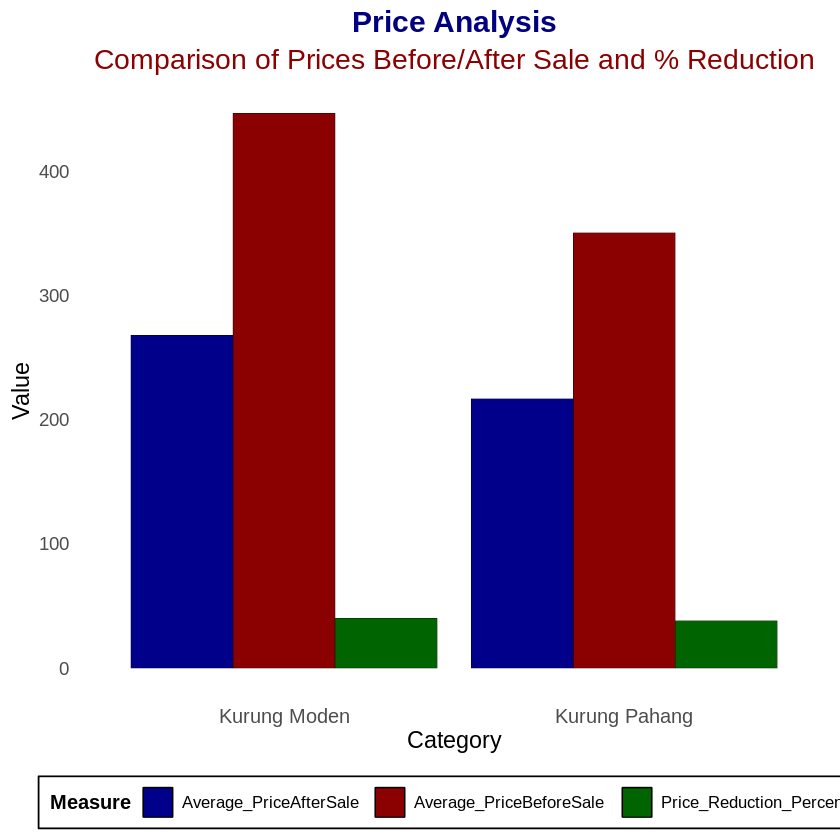

In [20]:
# Creating a long format for ggplot2
long_data <- pivot_longer(categories_analysis_actual, cols = c("Average_PriceBeforeSale", "Average_PriceAfterSale", "Price_Reduction_Percent"), names_to = "Measure", values_to = "Value")

ggplot(long_data, aes(x = Category, y = Value, fill = Measure)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", size = 0.1) +  # Set dodge width
  geom_text(aes(label = round(Value, 2)), position = position_dodge(width = 0.9), vjust = -0.5, size = 3.5, color = "white") +  # Add text labels
  scale_fill_manual(values = c("Average_PriceBeforeSale" = "darkred", "Average_PriceAfterSale" = "darkblue", "Price_Reduction_Percent" = "darkgreen")) +
  labs(title = "Price Analysis",
       subtitle = "Comparison of Prices Before/After Sale and % Reduction",
       x = "Category",
       y = "Value",
       fill = "Measure") +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size = 12, vjust = 0.5),
        axis.title = element_text(size = 14),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "navy"),
        plot.subtitle = element_text(size = 17, hjust = 0.5, color = "darkred"),
        legend.position = "bottom",
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 10),
        legend.background = element_rect(fill = "white", colour = "black", size = 0.5),
        legend.key = element_rect(fill = "white", colour = "black")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank())



The dataset comprises 62 entries for “Kurung Pahang” and 63 entries for “Kurung Moden”. For Kurung Moden, it started with an average price of RM 447 reducing to RM 268, marking a 40% reduction. This significant discount might be aimed at attracting customers seeking premium products at more accessible prices during sales. In contrast, for “Kurung Pahang”, the average price before sales was RM 351 and the average price after sale was RM 217. This category shows reduction of approximately 38.1%, suggesting a moderate discount strategy to maintain affordability while still valuing traditional design.


The significant discounts on “Kurung Moden”, which generally has a higher base price, might be aimed at increasing the sales volume of these more expensive items. Higher priced items often have a lower turnover rate due to their cost, hence applying big discount can “Kurung Moden” more attractive, thus driving up sales. This strategy is particularly effective during seasonal sales when customers are more willing to spend on premium items if they perceive them as good deals. In contrast, “Kurung Pahang” receives smaller discounts, which suggest a strategy focused on sustaining steady sales volumes without the need for the big price cuts. This approach could be due to the perceived value of “Kurung Pahang” is traditionally high, and big discounts might undermine this perception, making this attire seem less premium.


The analysis reveals distinct pricing strategies between "Kurung Pahang" and "Kurung Moden " at Rizman Ruzaini website. While both categories aim to leverage sales to boost purchases, "Kurung Moden " employs more aggressive discounting, possibly to target a different customer segment compared to the more traditionally priced "Kurung Pahang". This strategic differentiation in pricing and product offering highlights the brand’s approach to catering to diverse customer preferences, balancing between traditional values and modern fashion demands. Understanding these dynamics helps in predicting future trends and could guide the brand in tailoring their product and pricing strategies to better meet market demands.
